In [1]:
import pandas as pd
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"

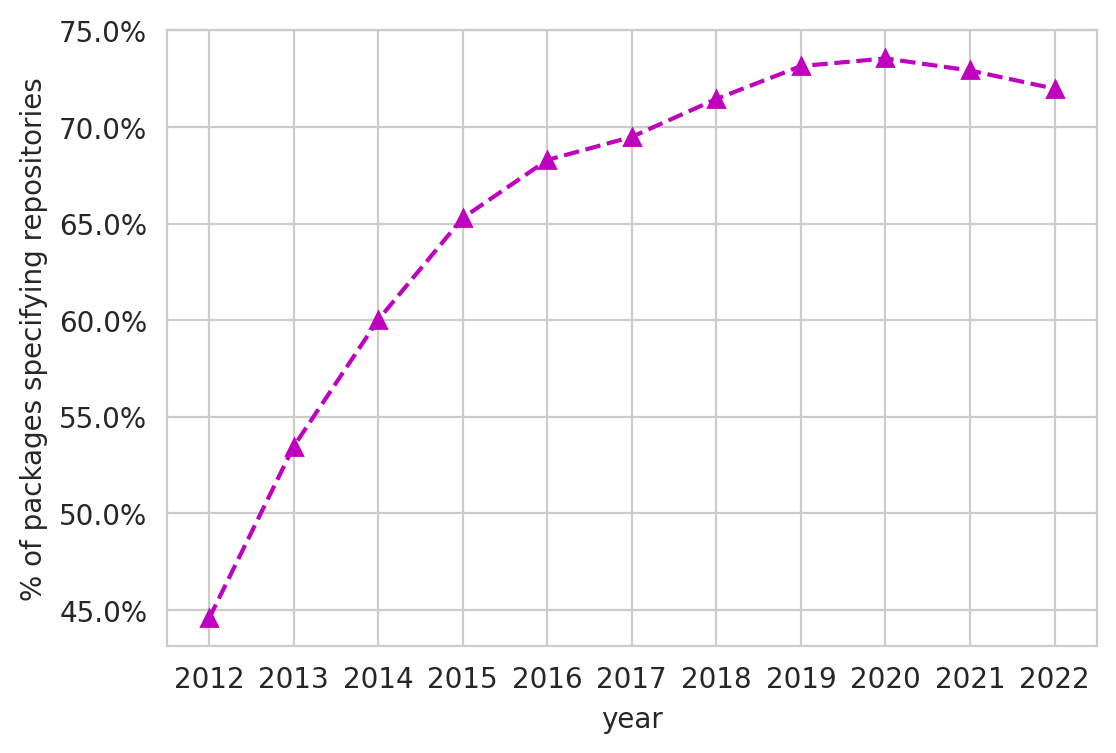

In [2]:
def plot_yearly_trend():
    yearly_data = pd.read_csv("data/yearly_package_count.csv", index_col="year")
    with sns.plotting_context("paper") and sns.axes_style("whitegrid"):
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(yearly_data.loc[2012:]["ratio"], "m^--")
        ax.set_xticks(range(2012, 2023))
        ax.set_xlabel("year")
        ax.set_ylabel("% of packages specifying repositories")
        yticks = np.arange(0.45, 0.80, 0.05)
        ax.set_yticks(yticks)
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in yticks])
        fig.savefig("figures/yearly_package_with_repo.pdf", bbox_inches="tight")
    
plot_yearly_trend()

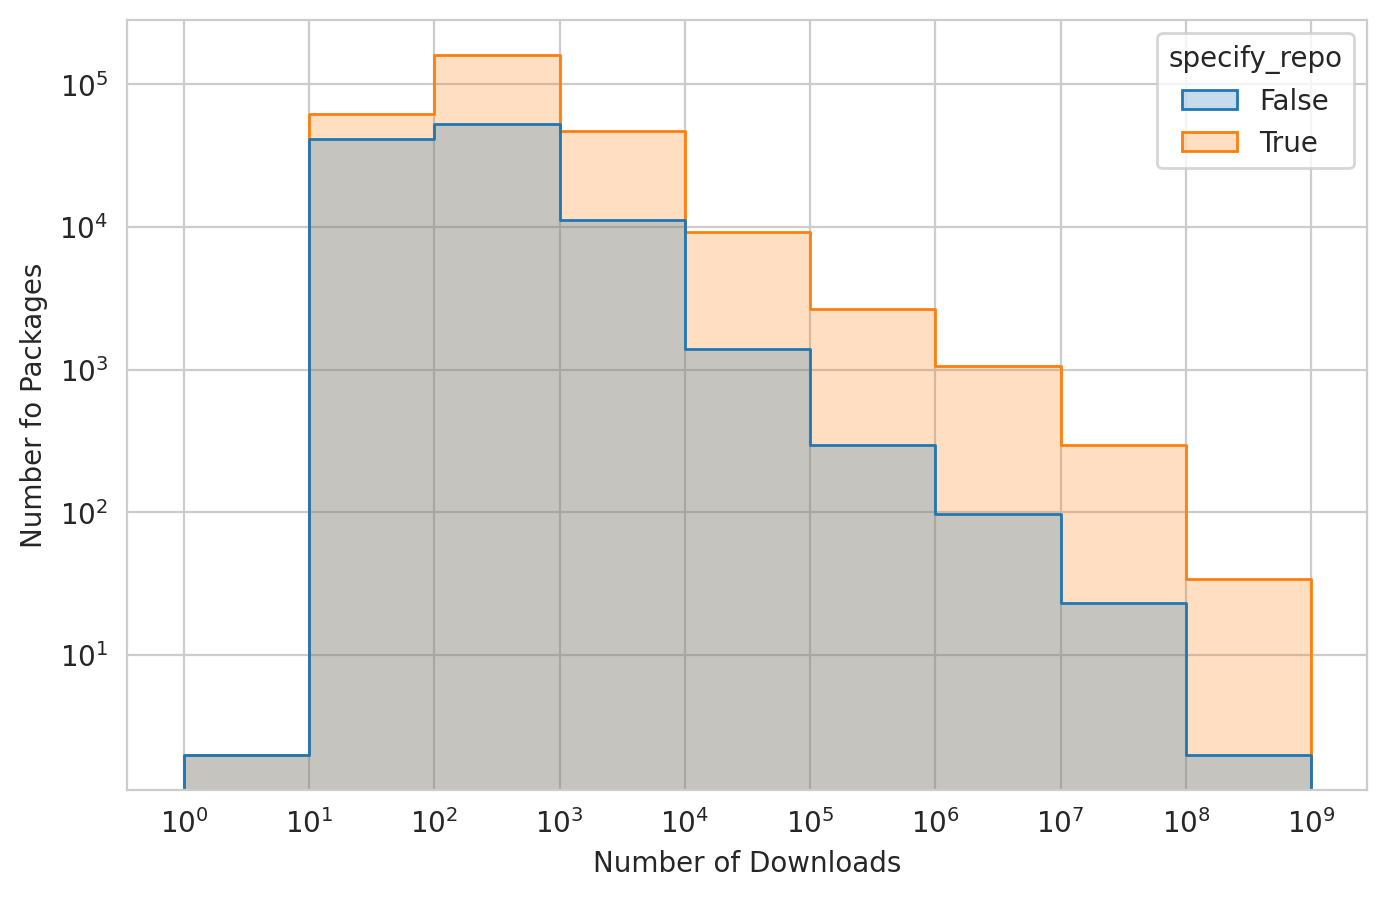

In [3]:
def plot_down_dist():
    package_downloads = pd.read_csv("data/downloads.csv")
    with sns.plotting_context("paper") and sns.axes_style("whitegrid"):
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.histplot(
            data=package_downloads,
            x="downloads",
            hue="specify_repo",
            element="step",
            bins=range(10),
            log_scale=(10, 10),
            ax=ax,
            stat="count"
        )
        ax.set_xticks([10**i for i in range(0, 10)])
        ax.set_xlabel("Number of Downloads")
        ax.set_ylabel("Number fo Packages")
        fig.savefig("figures/download_distribution.pdf", bbox_inches="tight")


plot_down_dist()


In [4]:
from scipy.stats import mannwhitneyu

package_downloads = pd.read_csv("data/downloads.csv")
mannwhitneyu(
    package_downloads[package_downloads["specify_repo"]]["downloads"],
    package_downloads[~package_downloads["specify_repo"]]["downloads"],
)


MannwhitneyuResult(statistic=19014438789.0, pvalue=0.0)

In [5]:
package_downloads[~package_downloads["specify_repo"]].head()

,name,downloads,specify_repo
31,pytz,114567995,False
33,cffi,110103327,False
37,docutils,88819977,False
52,grpcio-status,72691856,False
67,beautifulsoup4,62052531,False


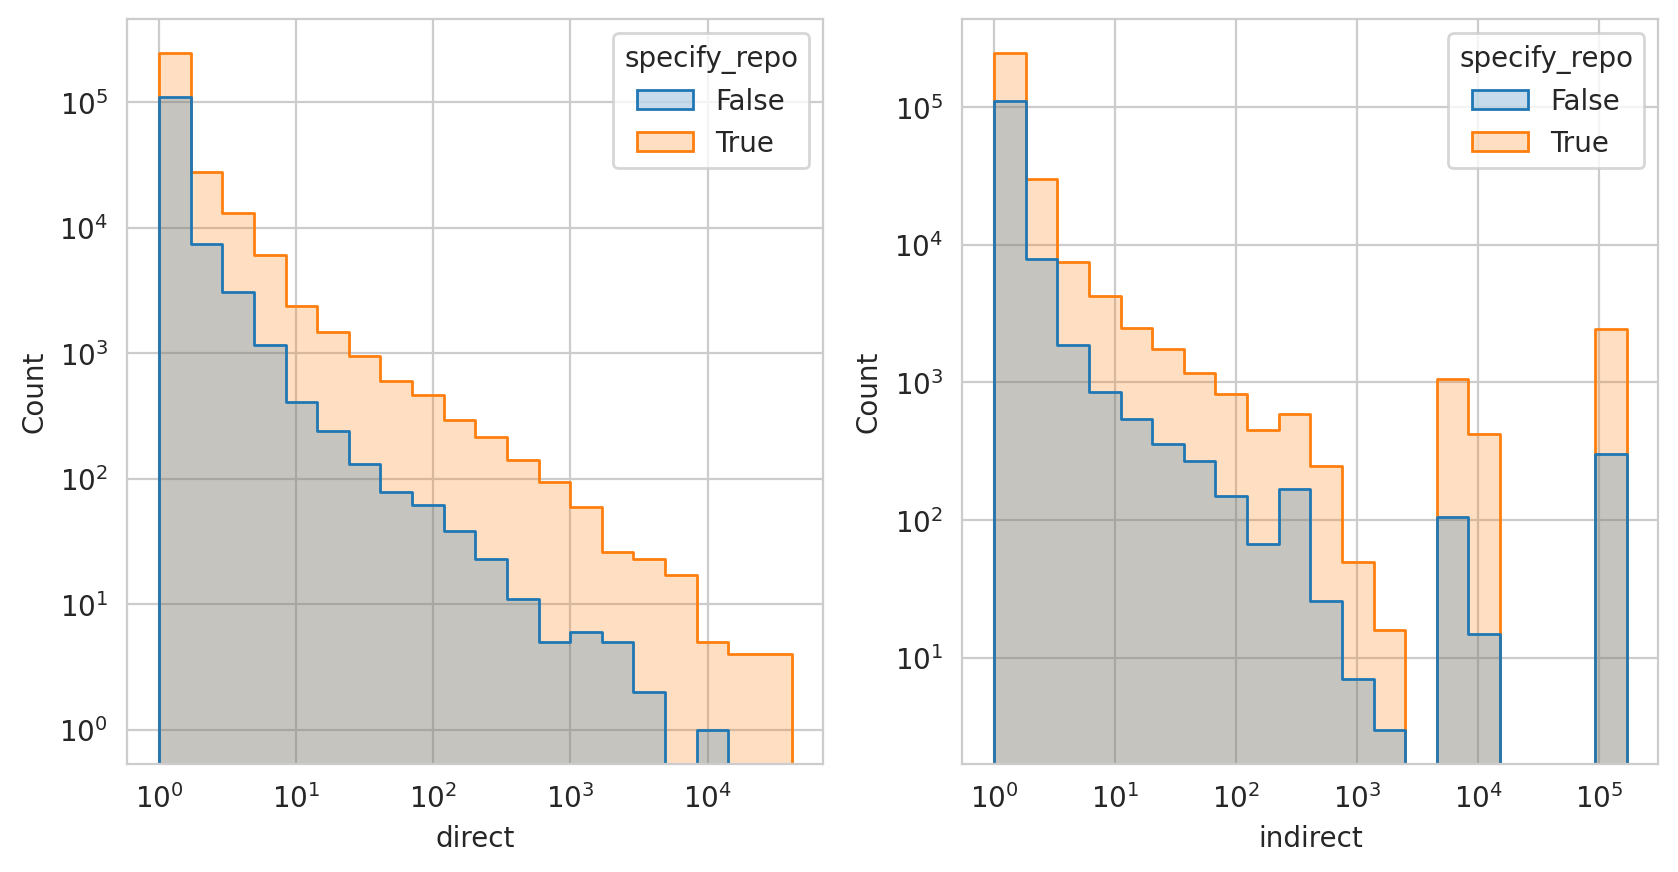

In [7]:
def plot_dep_dist():
    data = pd.read_csv("data/dependents_count.csv")
    data["direct"] = data["direct"] + 1
    data["indirect"] = data["indirect"] + 1
    with sns.plotting_context("paper") and sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(1, 2, figsize=(8.5, 4.5))
        sns.histplot(data, x="direct", hue="specify_repo", log_scale=(10, 10), element="step", stat="count", ax=axes[0])
        sns.histplot(data, x="indirect", hue="specify_repo", log_scale=(10, 10), element="step", stat="count", ax=axes[1])
        plt.tight_layout()
        fig.savefig("figures/dependent_distribution.pdf", bbox_inches="tight")
        # sns.violinplot(deps_cnt, y="direct", hue="with_repos", ax=axes[0])

plot_dep_dist()

In [16]:
dependents_data = pd.read_csv("data/dependents_count.csv")
mannwhitneyu(
    dependents_data[dependents_data["specify_repo"]]["direct"], 
    dependents_data[~dependents_data["specify_repo"]]["direct"]
), mannwhitneyu(
    dependents_data[dependents_data["specify_repo"]]["indirect"], 
    dependents_data[~dependents_data["specify_repo"]]["indirect"]
)

(MannwhitneyuResult(statistic=17077863156.0, pvalue=0.0),
 MannwhitneyuResult(statistic=17085583540.0, pvalue=0.0))

In [17]:
dependents_data[(~dependents_data["specify_repo"]) & (dependents_data["direct"] >= 1000)]

,name,direct,indirect,specify_repo
6825,beautifulsoup4,4895,162751,False
19312,cffi,1301,163229,False
35439,grpcio,1352,162751,False
44097,sklearn,2261,162810,False
69717,pytz,4394,164843,False
92110,numba,2136,162751,False
218255,pyqt5,2253,163415,False
225420,jupyter,1522,162784,False
251938,nose,1487,162863,False
293050,bs4,2137,162835,False


In [22]:
dependents_data[(~dependents_data["specify_repo"]) & (dependents_data["indirect"] >= 100000)].head(10)

,name,direct,indirect,specify_repo
978,morfessor,25,162751,False
4342,itk,103,162812,False
6502,objgraph,51,162751,False
6825,beautifulsoup4,4895,162751,False
8081,mimeparse,8,162752,False
14097,z3c.testsetup,2,162752,False
14192,pyqt6-sip,15,162791,False
16607,trame-vtk,2,162752,False
16744,pyqt6-qt,1,162791,False
18228,pyside,45,162765,False
